Marketing Campaign Performance Insights

In [8]:
import pandas as pd
File= "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"

df=pd.read_csv(File)
df.head()


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [12]:
df.shape

(22029, 16)

In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [30]:
print("Campaign_ID:",df.Campaign_ID.nunique())
print("Location:", df.Location.nunique())
print("Customer_Segment:",df.Customer_Segment.nunique())
print("Campaign_Type Count",df.Campaign_Type.value_counts())
print("Channel_Used Count",df.Channel_Used.value_counts())

Campaign_ID: 22029
Location: 10
Customer_Segment: 5
Campaign_Type Count Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
Channel_Used Count Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


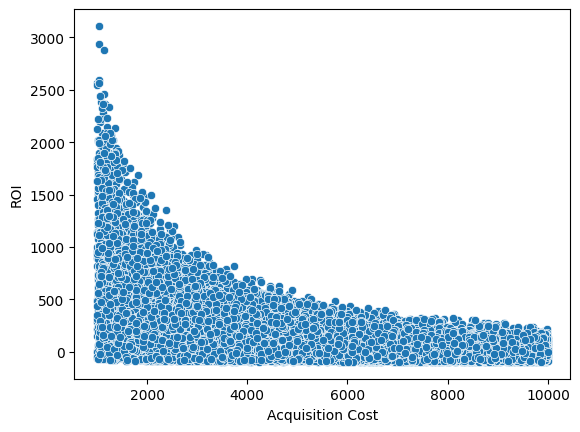

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df,x='Acquisition_Cost',y='ROI')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')

plt.show()

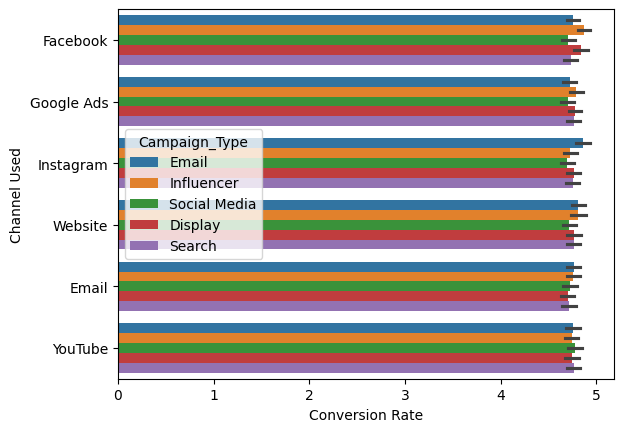

In [35]:
sns.barplot(data=df,x='Conversion_Rate',y="Channel_Used",hue='Campaign_Type')
plt.xlabel('Conversion Rate')
plt.ylabel('Channel Used')
plt.show()

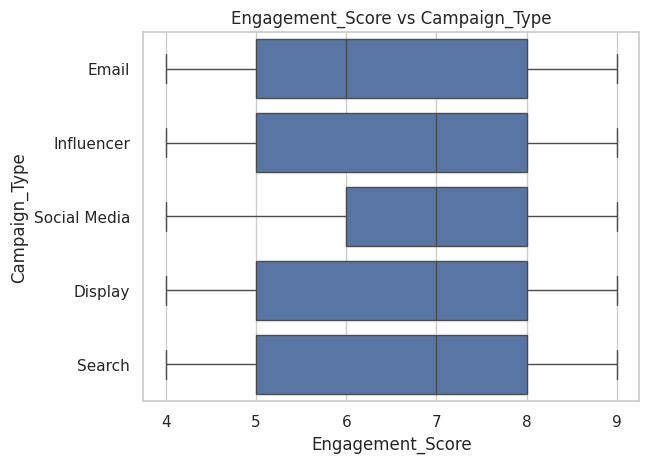

In [44]:
sns.boxplot(data=df,x='Engagement_Score',y="Campaign_Type")
plt.title('Engagement_Score vs Campaign_Type')
plt.xlabel('Engagement_Score')
plt.ylabel('Campaign_Type')
plt.show()

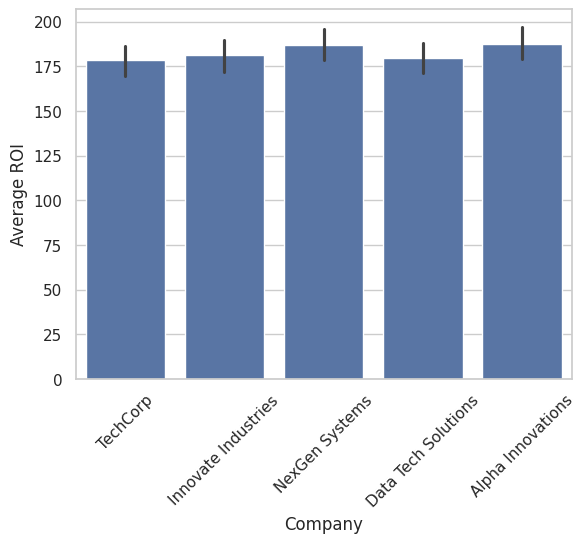

In [48]:
sns.barplot(data=df, x='Company', y='ROI', estimator='mean')
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

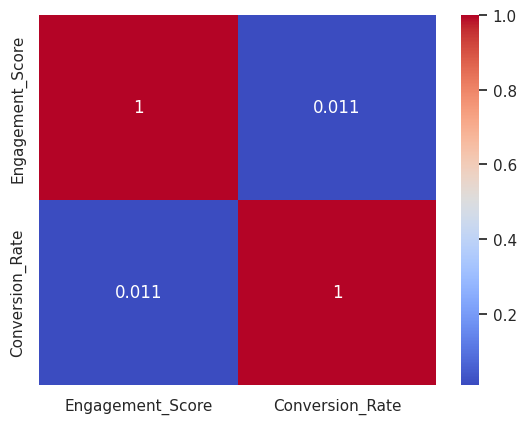

In [52]:
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

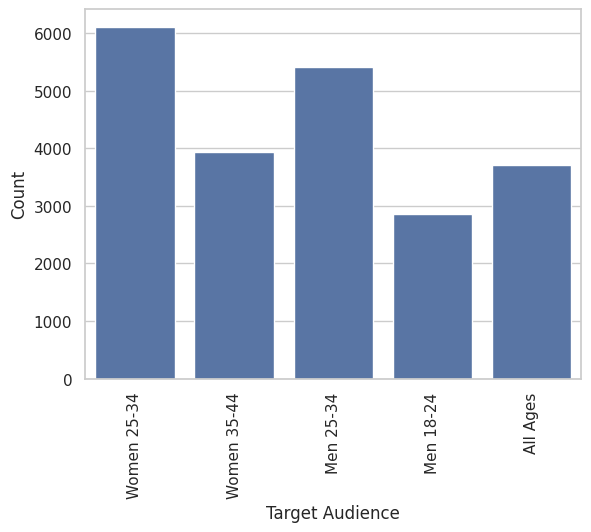

In [55]:
sns.countplot(data=df,x='Target_Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

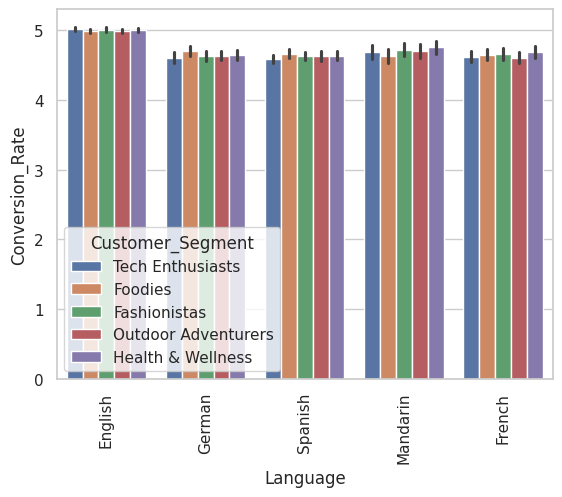

In [61]:
avg_conversion_rate = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()
sns.barplot(data=df,x='Language',y='Conversion_Rate',hue='Customer_Segment')
plt.xlabel('Language')
plt.xticks(rotation=90)
plt.show()

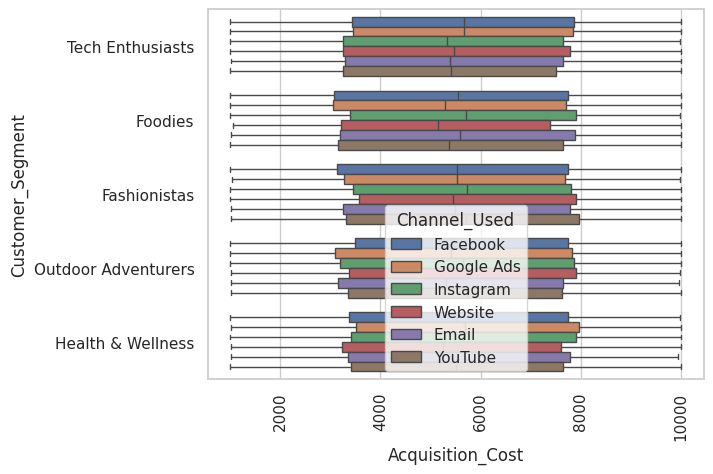

In [66]:
sns.boxplot(data=df,x='Acquisition_Cost',y='Customer_Segment',hue='Channel_Used')
plt.xlabel('Acquisition_Cost')
plt.xticks(rotation=90)
plt.show()

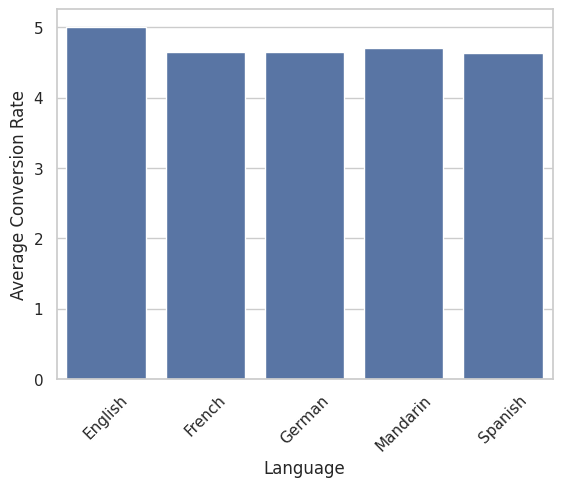

In [68]:
avg_conversion_rate_by_language = df.groupby('Language')['Conversion_Rate'].mean().reset_index()
sns.barplot(data=avg_conversion_rate_by_language, x='Language', y='Conversion_Rate')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.show()


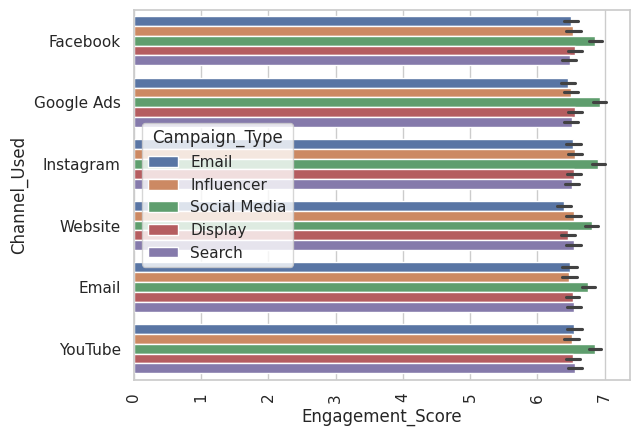

In [70]:
sns.barplot(data=df,x='Engagement_Score',y='Channel_Used',hue='Campaign_Type')
plt.xlabel('Engagement_Score')
plt.xticks(rotation=90)
plt.show()

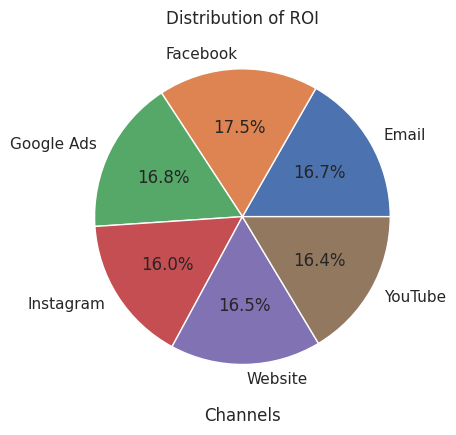

In [79]:
roi_by_channel = df.groupby('Channel_Used')['ROI'].sum()
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct='%1.1f%%')

plt.title('Distribution of ROI')
plt.xlabel('Channels')
plt.xticks(rotation=90)
plt.show()

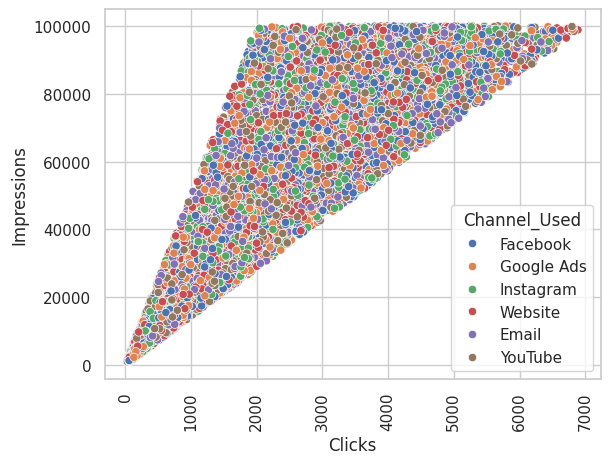

In [80]:
sns.scatterplot(data=df,x='Clicks',y='Impressions',hue='Channel_Used')
plt.xlabel('Clicks')
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, '30 days'),
  Text(1, 0, '45 days'),
  Text(2, 0, '15 days'),
  Text(3, 0, '60 days')])

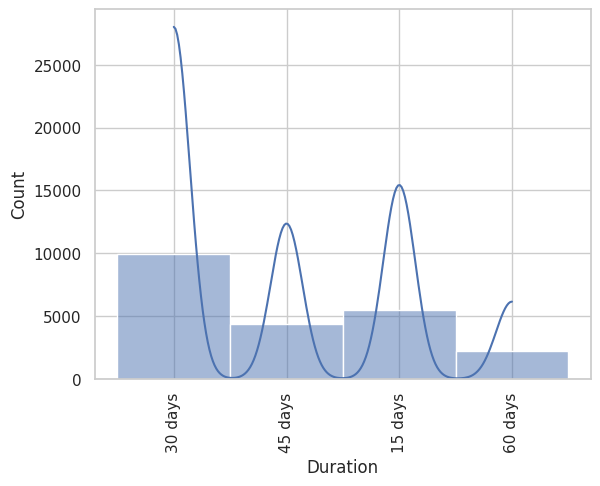

In [84]:
sns.histplot(data=df,x='Duration', kde=True)
plt.xlabel('Duration')
plt.xticks(rotation=90)

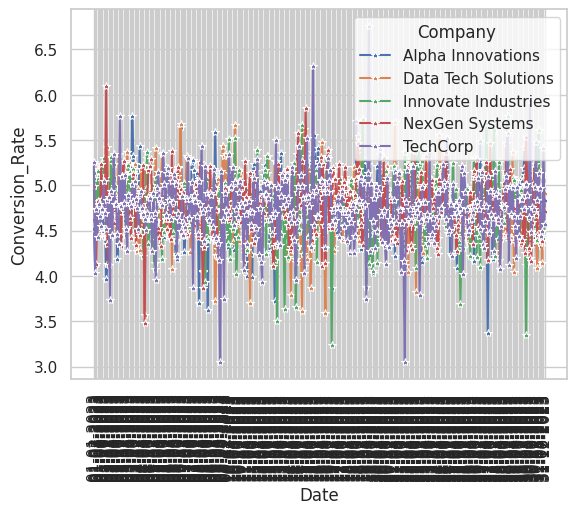

In [101]:
conversion_over_time = df.groupby(['Date', 'Company'])['Conversion_Rate'].mean().reset_index()
sns.lineplot(data=conversion_over_time,x='Date',y='Conversion_Rate',hue='Company',marker='*')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

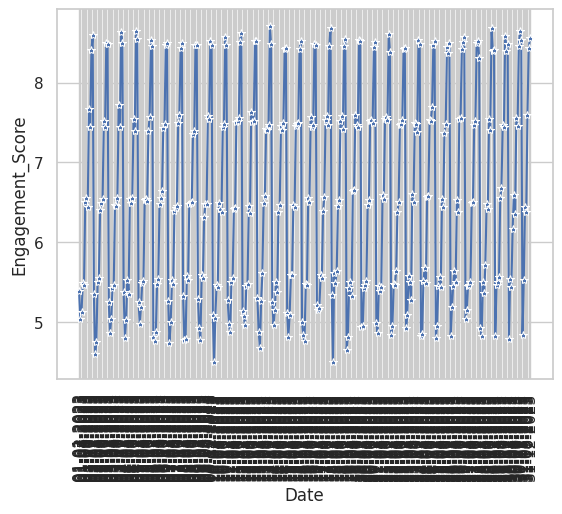

In [100]:
engagement_trend = df.groupby('Date')['Engagement_Score'].mean().reset_index()
sns.lineplot(data=engagement_trend,x='Date',y='Engagement_Score',marker='*')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

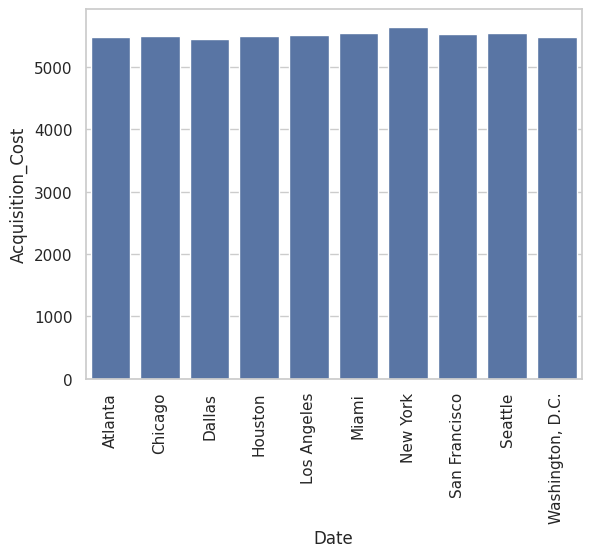

In [107]:
location_acquisition = df.groupby('Location')['Acquisition_Cost'].mean().reset_index()
sns.barplot(data=location_acquisition, x='Location', y='Acquisition_Cost')

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

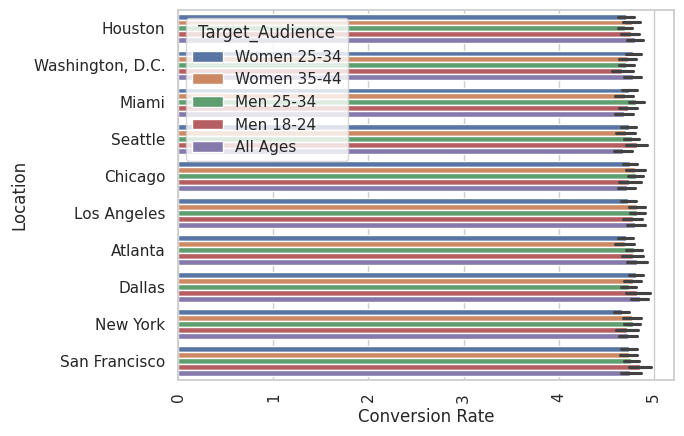

In [110]:
sns.barplot(data=df,x='Conversion_Rate',y='Location',hue='Target_Audience')
plt.xlabel('Conversion Rate')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.show()

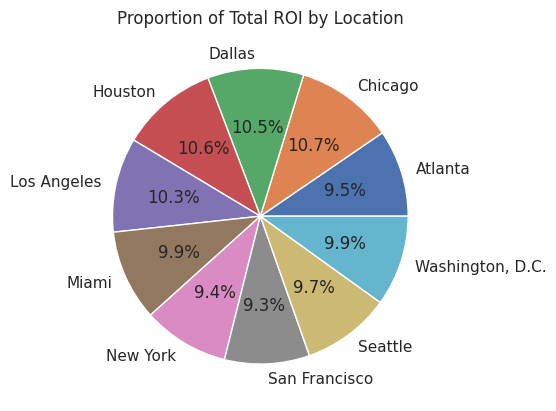

In [111]:
roi_by_location = df.groupby('Location')['ROI'].sum()

plt.pie(roi_by_location,labels=roi_by_location.index,autopct='%1.1f%%')
plt.title('Proportion of Total ROI by Location')
plt.show()
